In [8]:
import pandas as pd
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline, exp_range,\
    fit_and_score_iteratively, validation_curve_with_undersampling, plot_validation_curve_with_undersampling
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import fbeta_score, make_scorer

In [2]:
from scipy.io import arff

with open('1year.arff','r') as f:
    data1, meta1 = arff.loadarff(f)
    data1 = np.asarray(data1.tolist(), dtype=np.float32)
    print(data1.shape)

with open('2year.arff','r') as f:
    data2, meta2 = arff.loadarff(f)
    data2 = np.asarray(data2.tolist(), dtype=np.float32)
    print(data2.shape)

with open('3year.arff','r') as f:
    data3, meta3 = arff.loadarff(f)
    data3 = np.asarray(data3.tolist(), dtype=np.float32)
    print(data3.shape)

with open('4year.arff','r') as f:
    data4, meta4 = arff.loadarff(f)
    data4 = np.asarray(data4.tolist(), dtype=np.float32)
    print(data4.shape)

with open('5year.arff','r') as f:
    data5, meta5 = arff.loadarff(f)
    data5 = np.asarray(data5.tolist(), dtype=np.float32)
    print(data5.shape)


(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


In [3]:
data = np.concatenate([data1, data2, data3, data4, data5], axis=0)
data[np.isnan(data)] = 0

X, y = data[:,:-1], data[:, -1]
print(f'X.shape={X.shape}, y.shape={y.shape}')

X.shape=(43405, 64), y.shape=(43405,)


# Naive fit

In [4]:
classifier = KNeighborsClassifier(n_neighbors=5)
res = fit_and_score_iteratively(classifier, X, y, None, iterations=1)
print(res)

[0.94793427 0.0173913  0.0952381  0.00956938 0.50248537]


In [7]:
classifier = KNeighborsClassifier(n_neighbors=5)
res = fit_and_score_iteratively(classifier, X, y, 3, iterations=10)
print(res)

a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
[0.7391391  0.37512506 0.46727214 0.31371611 0.59729376]


In [5]:
classifier = KNeighborsClassifier(n_neighbors=5)
res = fit_and_score_iteratively(classifier, X, y, 1, iterations=10)
print(res)

a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
[0.64653386 0.64720389 0.64581518 0.64880383 0.64653567]


# Validation Curves

In [6]:
n_neighbors_range = list(set(list(range(1, 11)) + list(exp_range(1, 50, increment=1, exp=1.5))))
n_neighbors_range.sort()

param=1
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=2
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=3
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=4
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=5
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=6
a=0.0, r=1, gamma=20.040858

a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=234
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=243
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=252
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=262
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
param=272
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.0408

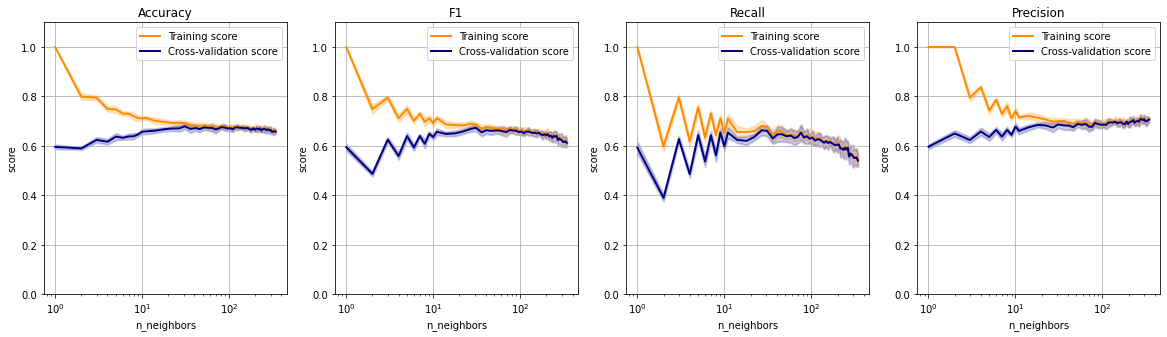

In [10]:
# optimize hidden_layer_sizes

classifier = KNeighborsClassifier()
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scoring = ['accuracy', 'f1', 'recall', 'precision']

results_store, plt = plot_validation_curve_with_undersampling(classifier, X_train, y_train, 
                      param_name='n_neighbors', param_range=n_neighbors_range, fit_params=None, error_score='raise',
                      cv=cv, scoring=scoring, n_jobs=8, iterations=5, undersampling_ratio=1, 
                      x_axis_is_log=True)



# Learning Curves

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=)

title = 'Decision Tree Learning Curves'
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
plt = plot_learning_curve(classifier, title, X, y, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='f1')